In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import OrderedDict
import io

# (1) Preliminary EDA: Total Dataset

In [13]:
# Total dataframe with 81,544 observatins from Q1 2016. 
# 60,430 Fully Paid observations and 21,114 Charged Off observations
master = pd.read_csv('LC2016Q1_v2_copy.csv', skiprows=0)
master = master.sample(frac=0.1)

In [14]:
# master.columns

In [15]:
master['zip_code'] = master['zip_code']

# for i in range(0, len(master)):
#     if len(master.iloc[i]['zip_code']) == 2:
#         master.iloc[i,12] = '0' + master.iloc[i,12]

In [16]:
race = pd.read_csv('zip_proportions_correct.csv')
race = race.drop("Unnamed: 0",axis=1)

# for i in range(0, len(race)):
#     if len(race.iloc[i]['Zip Code']) == 2:
#         race.iloc[i,0] = '0' + race.iloc[i,0]

In [17]:
# Zip codes that belong to military bases or are out of use,
# but still appear in the lending club database. We do not have racial data on 
# these zip codes
unused_zips = [872, 90, 962, 963, 964, 965, 966, 332, 987]

interest_rates = []
black_props = []

for row in range(0,len(master)-1):
    if master.iloc[row]['zip_code'] in unused_zips:
        continue
    
    interest_rate = master.iloc[row]['int_rate']
    interest_rates.append(interest_rate)
    
    race_row = race[race['Zip Code'] == master.iloc[row]['zip_code']]
    proportion = race_row['Black Proportion'].values
    black_props.append(float(proportion))

TypeError: only size-1 arrays can be converted to Python scalars

ValueError: x and y must be the same size

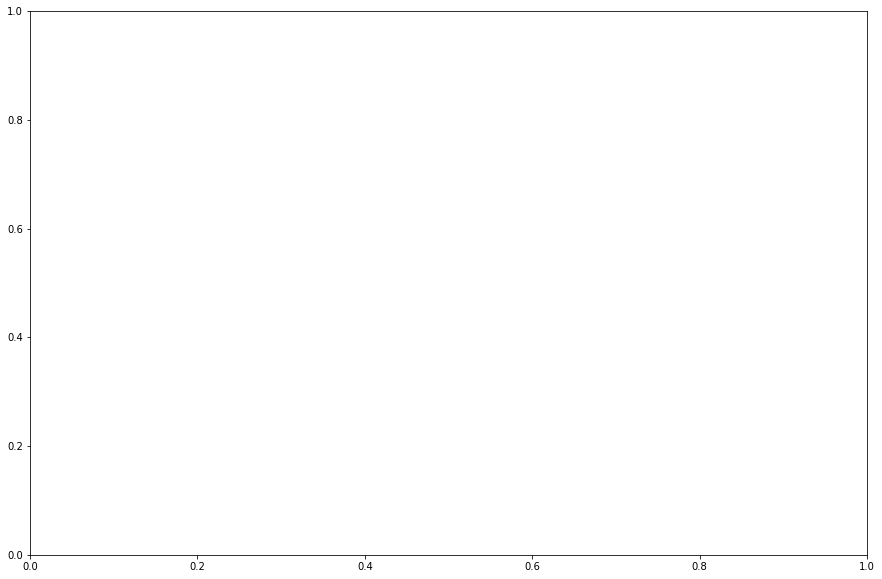

In [18]:
f = plt.figure(figsize=(15,10))

plt.scatter(black_props, interest_rates)

In [19]:
unused_zips = [872, 90, 962, 963, 964, 965, 966, 332, 987]

interest_rates = []
white_props = []

for row in range(0,len(master)-1):
    if master.iloc[row]['zip_code'] in unused_zips:
        continue
    
    interest_rate = master.iloc[row]['int_rate']
    interest_rates.append(interest_rate)
    
    race_row = race[race['Zip Code'] == master.iloc[row]['zip_code']]
    proportion = race_row['White Proportion'].values
    white_props.append(float(proportion))

TypeError: only size-1 arrays can be converted to Python scalars

ValueError: x and y must be the same size

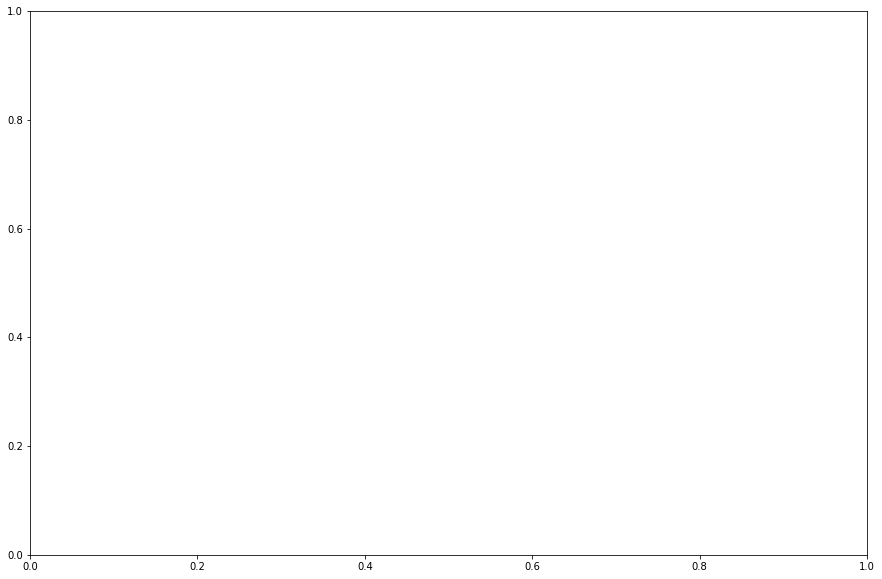

In [20]:
f = plt.figure(figsize=(15,10))

plt.scatter(white_props, interest_rates, color='g')

In [21]:
unused_zips = [872, 90, 962, 963, 964, 965, 966, 332, 987]

interest_rates = []
hisp_props = []

for row in range(0,len(master)-1):
    if master.iloc[row]['zip_code'] in unused_zips:
        continue
    
    interest_rate = master.iloc[row]['int_rate']
    interest_rates.append(interest_rate)
    
    race_row = race[race['Zip Code'] == master.iloc[row]['zip_code']]
    proportion = race_row['Hispanic Proportion'].values
    hisp_props.append(float(proportion))

TypeError: only size-1 arrays can be converted to Python scalars

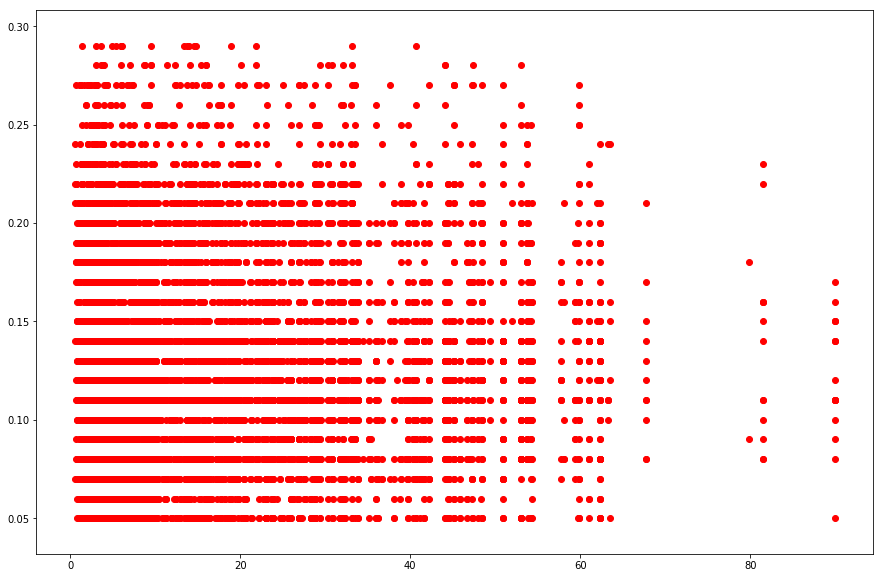

In [164]:
f = plt.figure(figsize=(15,10))

plt.scatter(hisp_props, interest_rates, color='r')

In [166]:
unused_zips = [872, 90, 962, 963, 964, 965, 966, 332, 987]

interest_rates = []
asian_props = []

for row in range(0,len(master)-1):
    if master.iloc[row]['zip_code'] in unused_zips:
        continue
    
    interest_rate = master.iloc[row]['int_rate']
    interest_rates.append(interest_rate)
    
    race_row = race[race['Zip Code'] == master.iloc[row]['zip_code']]
    proportion = race_row['Asian Proportion'].values
    asian_props.append(float(proportion))

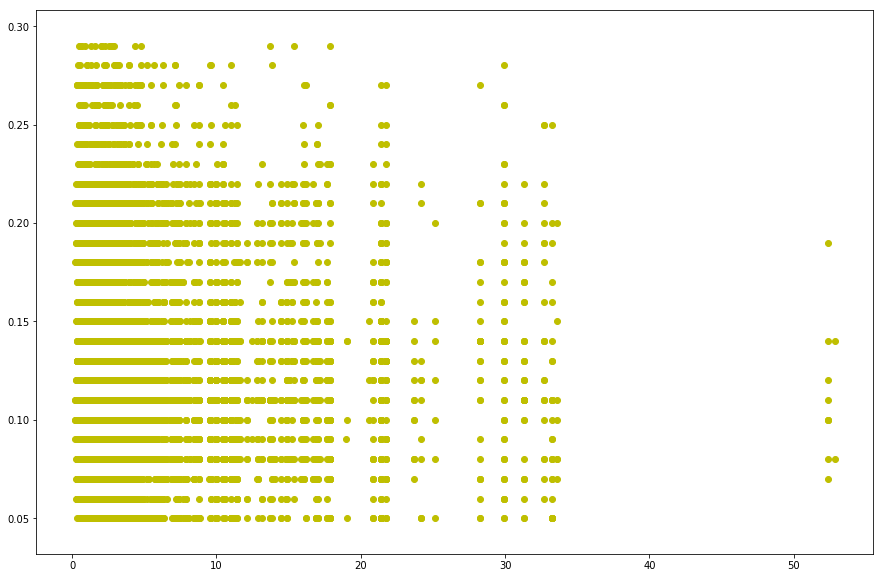

In [168]:
f = plt.figure(figsize=(15,10))

plt.scatter(asian_props, interest_rates, color='y')

# (2) Investing Deepdive: Fully Paid vs. Charged Off

In [26]:
# Dataset of 40,000 observations, with 20,0000 from 
df = pd.read_csv('EDA_sample.csv')

In [3]:
# df.columns.get_loc('revol_util')

In [27]:
fp = df[df['loan_status'] == 'Fully Paid']
cf = df[df['loan_status'] == 'Charged Off']

In [8]:
# Code to download CSV's

# import csv
# with open("EDA_sample.csv","w") as out:
#     out.write(EDA_sample.to_csv())

In [31]:
dfe = df.copy()

#dfe['int_rate'] = dfe['int_rate'].apply(lambda x: x.strip('%'))
#dfe['revol_util'].apply(lambda x: x.strip('%'))

dfe['revol_util'].isnull().values.any()

True

In [15]:
mean_dti = np.mean(dfe['dti'])
dfe['dti'] = dfe['dti'].fillna(mean_dti)
# Column of incomes under 200000
dfe['income_200'] = dfe['annual_inc'][dfe['annual_inc'] < 200000]
# Column of dti's under 100
dfe['dti_100'] = dfe['dti'][dfe['dti'] < 100]

In [16]:
dfe.columns.get_loc('dti_100')

80

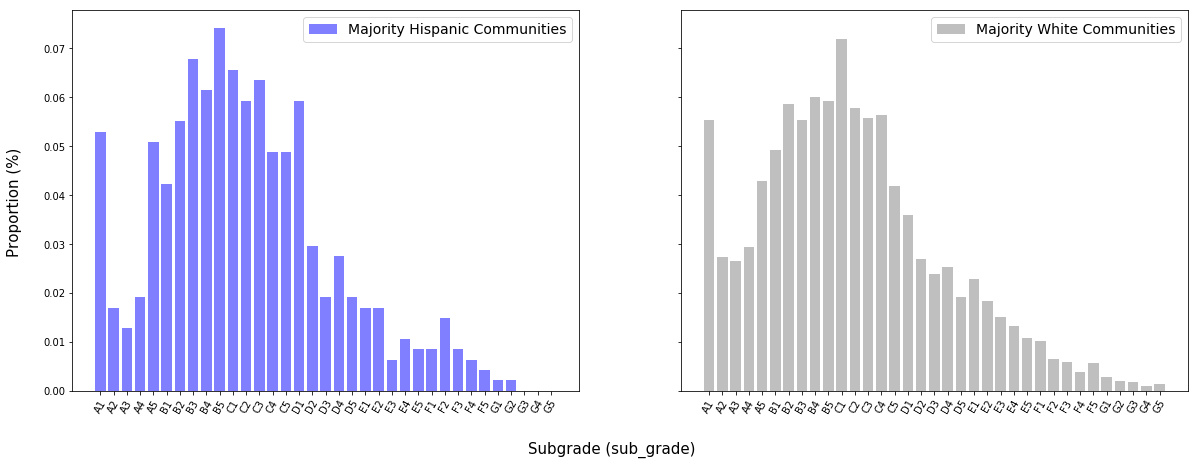

In [207]:
# Extract majority hispanic and white zip codes and respective rows in LC database
mhz = list(race[race['Hispanic Proportion'] > 50]['Zip Code'])
mhsg = master[master['zip_code'].isin(mhz)]['sub_grade']

mwz = list(race[race['White Proportion'] > 50]['Zip Code'])
mwsg = master[master['zip_code'].isin(mwz)]['sub_grade']

dict_mhsg = mhsg.value_counts()
keys_mhsg = sorted(dict_mhsg.keys())
dict_mhsg = OrderedDict((key,dict_mhsg[key]) for key in keys_mhsg)
dict_mhsg.update((x, y/len(mhsg)) for x, y in dict_mhsg.items())

dict_mwsg = mwsg.value_counts()
keys_mwsg = sorted(dict_mwsg.keys())
dict_mwsg = OrderedDict((key,dict_mwsg[key]) for key in keys_mwsg)
dict_mwsg.update((x, y/len(mwsg)) for x, y in dict_mwsg.items())

# Plot
f, sp = plt.subplots(1, 2, sharex=True, sharey=True, figsize=(20,7))

sp[0].bar(dict_mhsg.keys(), dict_mhsg.values(), color = 'blue', alpha = 0.5)
sp[0].legend(['Majority Hispanic Communities'],prop={'size': 14})
sp[1].bar(dict_mwsg.keys(), dict_mwsg.values(), color = 'grey', alpha=0.5)
sp[1].legend(['Majority White Communities'],prop={'size': 14})
    
for tick in sp[0].get_xticklabels():
    tick.set_rotation(60)
for tick in sp[1].get_xticklabels():
    tick.set_rotation(60)
    
f.text(0.5, 0, 'Subgrade (sub_grade)', ha='center',size=15)
f.text(0.08, 0.5, 'Proportion (%)', va='center', rotation='vertical',size=15)

plt.show()

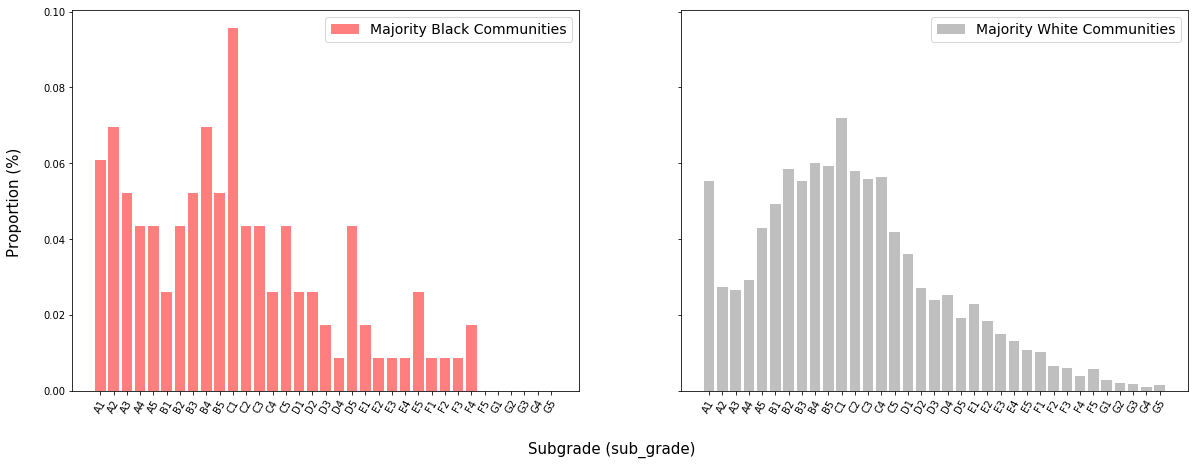

In [205]:
# Extract majority hispanic and white zip codes and respective rows in LC database
mbz = list(race[race['Black Proportion'] > 50]['Zip Code'])
mbsg = master[master['zip_code'].isin(mbz)]['sub_grade']

dict_mbsg = mbsg.value_counts()
keys_mbsg = sorted(dict_mbsg.keys())
dict_mbsg = OrderedDict((key,dict_mbsg[key]) for key in keys_mbsg)
dict_mbsg.update((x, y/len(mbsg)) for x, y in dict_mbsg.items())

# Plot
f, sp = plt.subplots(1, 2, sharex=True, sharey=True, figsize=(20,7))

sp[0].bar(dict_mbsg.keys(), dict_mbsg.values(), color = 'red', alpha = 0.5)
sp[0].legend(['Majority Black Communities'],prop={'size': 14})
sp[1].bar(dict_mwsg.keys(), dict_mwsg.values(), color = 'grey', alpha=0.5)
sp[1].legend(['Majority White Communities'],prop={'size': 14})
    
for tick in sp[0].get_xticklabels():
    tick.set_rotation(60)
for tick in sp[1].get_xticklabels():
    tick.set_rotation(60)
    
f.text(0.5, 0, 'Subgrade (sub_grade)', ha='center',size=15)
f.text(0.08, 0.5, 'Proportion (%)', va='center', rotation='vertical',size=15)

plt.show()

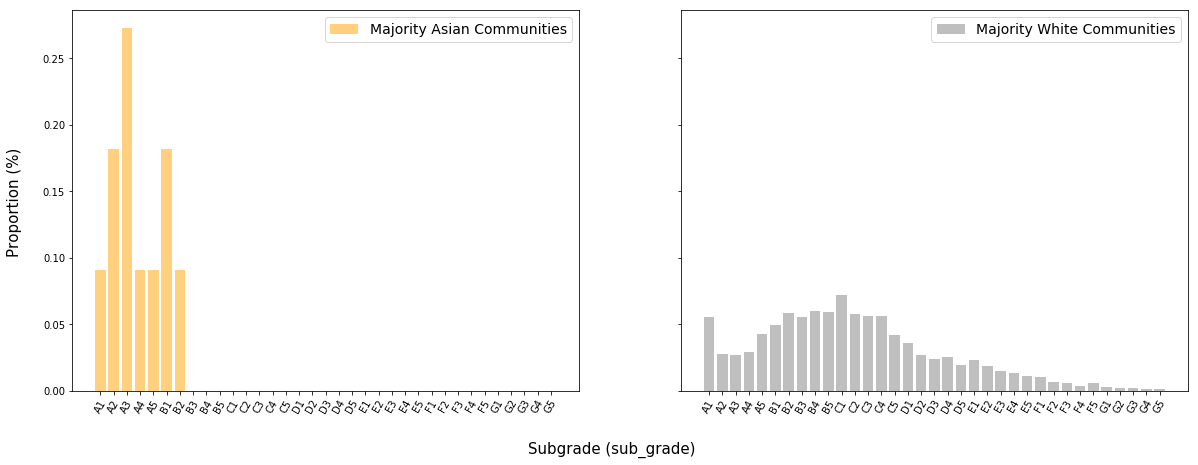

In [206]:
# Extract majority hispanic and white zip codes and respective rows in LC database
maz = list(race[race['Asian Proportion'] > 50]['Zip Code'])
masg = master[master['zip_code'].isin(maz)]['sub_grade']

dict_masg = masg.value_counts()
keys_masg = sorted(dict_masg.keys())
dict_masg = OrderedDict((key,dict_masg[key]) for key in keys_masg)
dict_masg.update((x, y/len(masg)) for x, y in dict_masg.items())

# Plot
f, sp = plt.subplots(1, 2, sharex=True, sharey=True, figsize=(20,7))

sp[0].bar(dict_masg.keys(), dict_masg.values(), color = 'orange', alpha = 0.5)
sp[0].legend(['Majority Asian Communities'],prop={'size': 14})
sp[1].bar(dict_mwsg.keys(), dict_mwsg.values(), color = 'grey', alpha=0.5)
sp[1].legend(['Majority White Communities'],prop={'size': 14})
    
for tick in sp[0].get_xticklabels():
    tick.set_rotation(60)
for tick in sp[1].get_xticklabels():
    tick.set_rotation(60)
    
f.text(0.5, 0, 'Subgrade (sub_grade)', ha='center',size=15)
f.text(0.08, 0.5, 'Proportion (%)', va='center', rotation='vertical',size=15)

plt.show()

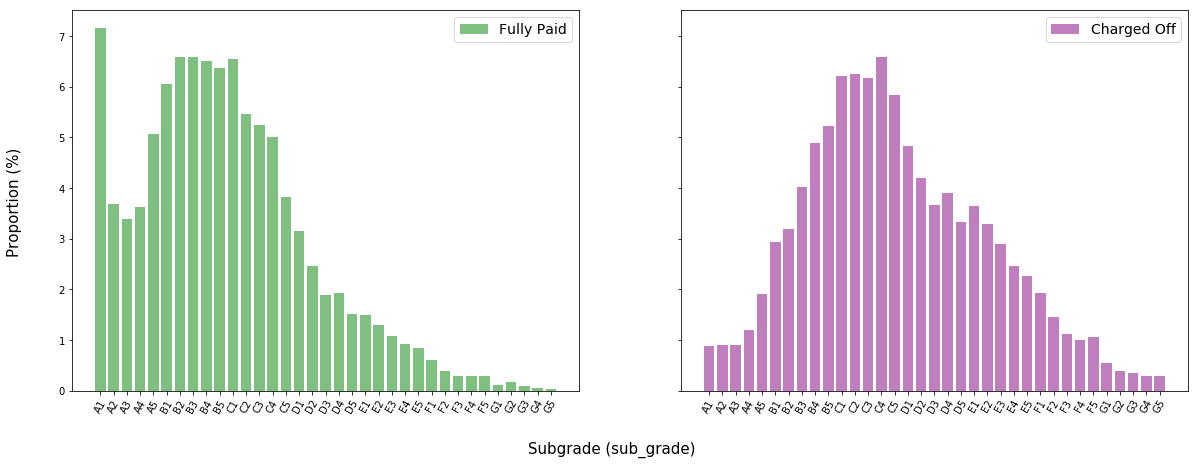

In [19]:
# Subgrade distribution
fpsg = fp.iloc[:,6]
cfsg = cf.iloc[:,6]

# Fully Paid Subgrade Counts
dict_fpsg = fpsg.value_counts()
keys_fpsg = sorted(dict_fpsg.keys())
dict_fpsg = OrderedDict((key,dict_fpsg[key]) for key in keys_fpsg)
dict_fpsg.update((x, y/200) for x, y in dict_fpsg.items())

# Charged Off Subgrade Counts
dict_cfsg = cfsg.value_counts()
keys_cfsg = sorted(dict_cfsg.keys())
dict_cfsg = OrderedDict((key,dict_cfsg[key]) for key in keys_cfsg)
dict_cfsg.update((x, y/200) for x, y in dict_cfsg.items())

# Plot
f, sp = plt.subplots(1, 2, sharex=True, sharey=True, figsize=(20,7))

sp[0].bar(dict_fpsg.keys(), dict_fpsg.values(), color = 'g', alpha = 0.5)
sp[0].legend(['Fully Paid'],prop={'size': 14})
sp[1].bar(dict_cfsg.keys(), dict_cfsg.values(), color = 'purple', alpha=0.5)
sp[1].legend(['Charged Off'],prop={'size': 14})
    
for tick in sp[0].get_xticklabels():
    tick.set_rotation(60)
for tick in sp[1].get_xticklabels():
    tick.set_rotation(60)
    
f.text(0.5, 0, 'Subgrade (sub_grade)', ha='center',size=15)
f.text(0.08, 0.5, 'Proportion (%)', va='center', rotation='vertical',size=15)

plt.show()

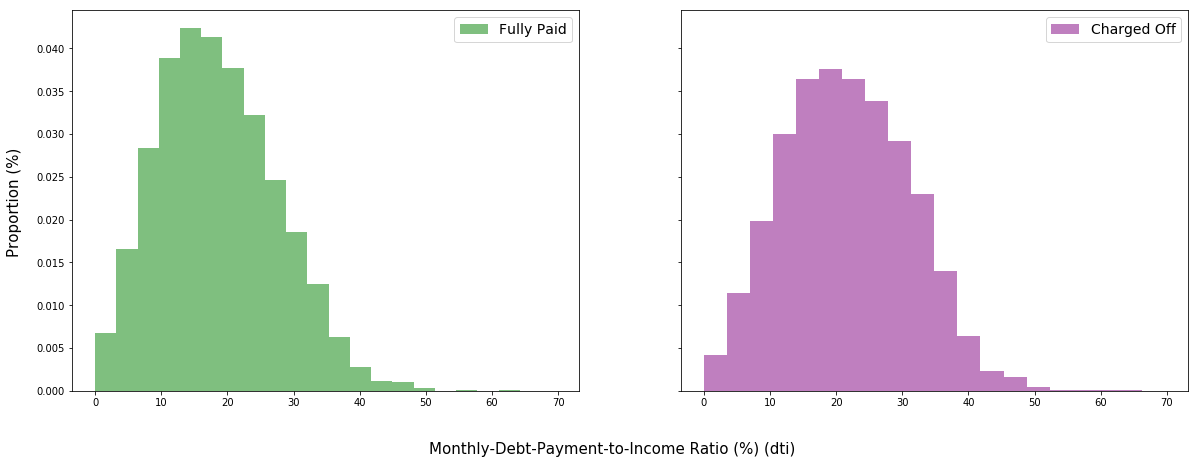

In [20]:
from collections import OrderedDict

# Extract DTI ratios below 70 for plotting (i.e. the vast majority)
fpdti = fp.iloc[:]['dti'].dropna()
fpdti = fpdti[fpdti<70]
cfdti = cf.iloc[:]['dti'].dropna()
cfdti = cfdti[cfdti<70]

# Plot
f, sp = plt.subplots(1, 2, sharex=True, sharey=True, figsize=(20,7))

sp[0].hist(fpdti, color = 'g', alpha = 0.5,bins=20,density=True)
sp[0].legend(['Fully Paid'],prop={'size': 14})
sp[1].hist(cfdti, color = 'purple', alpha=0.5,bins=20,density=True)
sp[1].legend(['Charged Off'],prop={'size': 14})

f.text(0.5, 0, 'Monthly-Debt-Payment-to-Income Ratio (%) (dti)', ha='center',size=15)
f.text(0.08, 0.5, 'Proportion (%)', va='center', rotation='vertical',size=15)

plt.show()

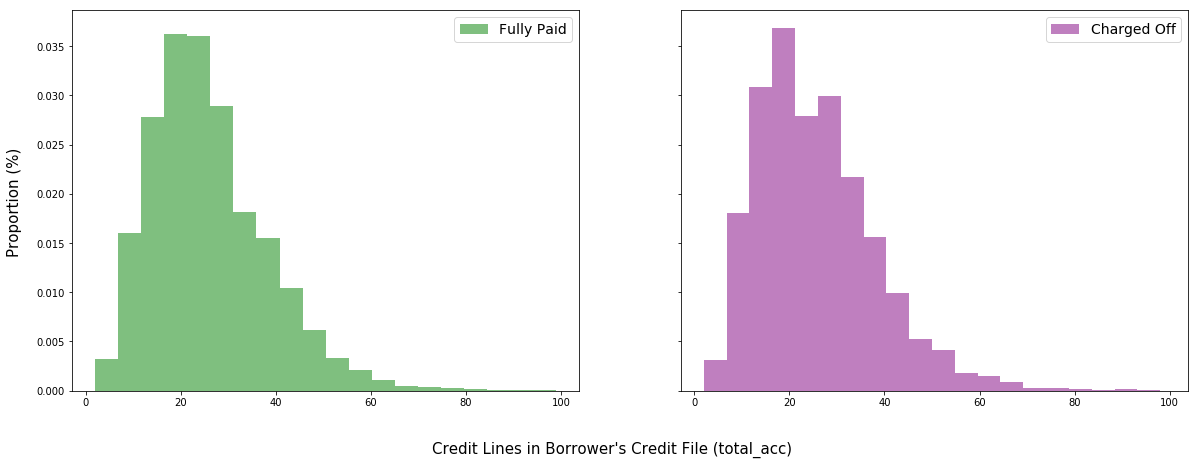

In [21]:
# Extract total number of credit lines currently in the borrower's credit file
fpta = fp.iloc[:]['total_acc'].dropna()
fpta = fpta[fpta<100]
cfta = cf.iloc[:]['total_acc'].dropna()
cfta = cfta[cfta<100]

# Plot
f, sp = plt.subplots(1, 2, sharex=True, sharey=True, figsize=(20,7))

sp[0].hist(fpta, color = 'g', alpha = 0.5,bins=20,density=True)
sp[0].legend(['Fully Paid'],prop={'size': 14})
sp[1].hist(cfta, color = 'purple', alpha=0.5,bins=20,density=True)
sp[1].legend(['Charged Off'],prop={'size': 14})
    
f.text(0.5, 0, "Credit Lines in Borrower's Credit File (total_acc)", ha='center',size=15)
f.text(0.08, 0.5, 'Proportion (%)', va='center', rotation='vertical',size=15)

plt.show()

In [19]:
for i in df['revol_util'].index:
    if pd.isnull(df['revol_util'][i]):
        df.iloc[i,21] = '0'
        
df['revol_util'] = df['revol_util'].apply(lambda x: x.strip('%'))

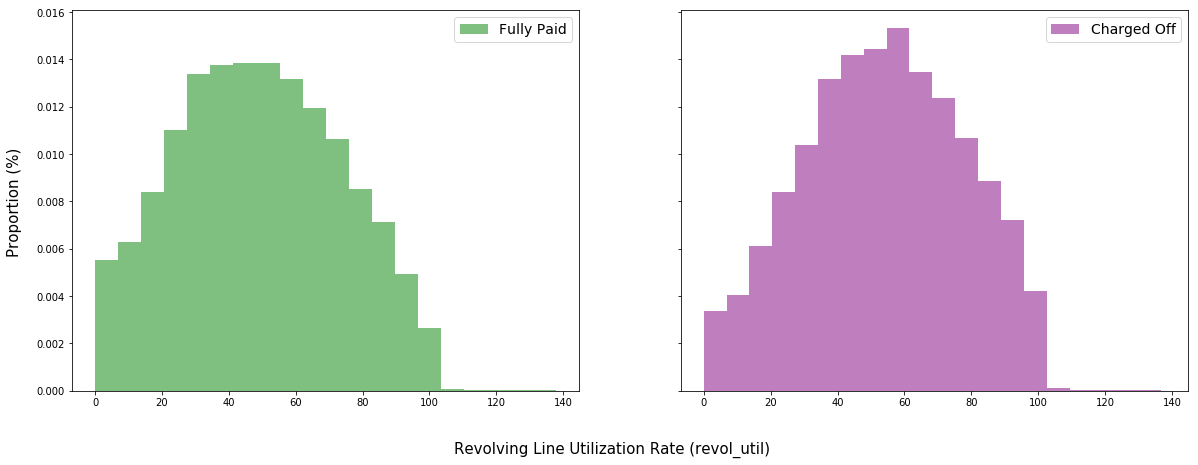

In [18]:
# Total credit revolving balance
fpru = fp.iloc[:]['revol_util'].astype(float)
# fprb = fprb[fprb<200000]
cfru = cf.iloc[:]['revol_util'].astype(float)
# cfrb = cfrb[cfrb<200000]

# Plot
f, sp = plt.subplots(1, 2, sharex=True, sharey=True, figsize=(20,7))

sp[0].hist(fpru, color = 'g', alpha = 0.5,bins=20,density=True)
sp[0].legend(['Fully Paid'],prop={'size': 14})
sp[1].hist(cfru, color = 'purple', alpha=0.5,bins=20,density=True)
sp[1].legend(['Charged Off'],prop={'size': 14})

f.text(0.5, 0, "Revolving Line Utilization Rate (revol_util)", ha='center',size=15)
f.text(0.08, 0.5, 'Proportion (%)', va='center', rotation='vertical',size=15)

plt.show()

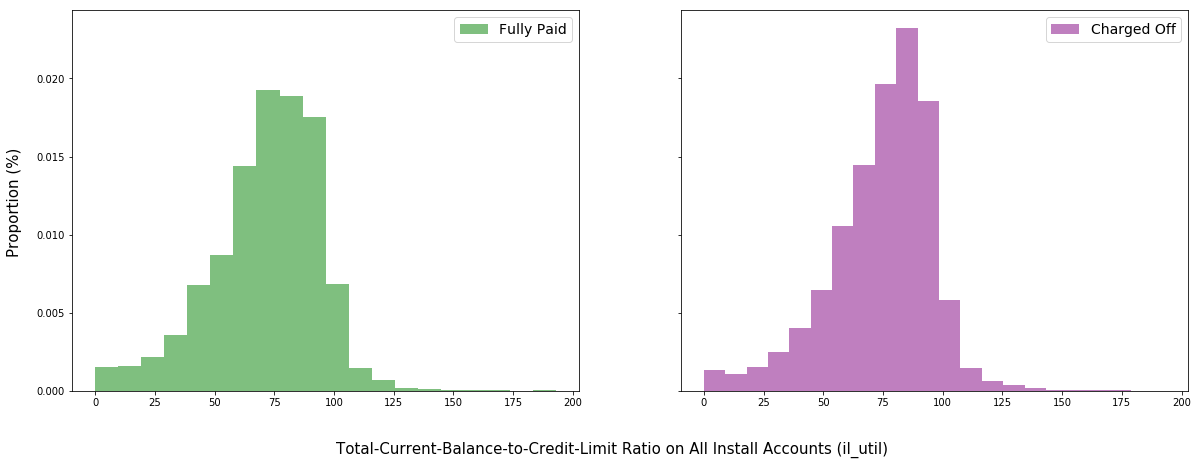

In [180]:
# Total credit revolving balance
fpiu = fp.iloc[:]['il_util'].dropna()
fpiu = fpiu[fpiu<200]
cfiu = cf.iloc[:]['il_util'].dropna()
cfiu = cfiu[cfiu<200]

# Plot
f, sp = plt.subplots(1, 2, sharex=True, sharey=True, figsize=(20,7))

sp[0].hist(fpiu, color = 'g', alpha = 0.5,bins=20,density=True)
sp[0].legend(['Fully Paid'],prop={'size': 14})
sp[1].hist(cfiu, color = 'purple', alpha=0.5,bins=20,density=True)
sp[1].legend(['Charged Off'],prop={'size': 14})

f.text(0.5, 0, "Total-Current-Balance-to-Credit-Limit Ratio on All Install Accounts (il_util)", ha='center',size=15)
f.text(0.08, 0.5, 'Proportion (%)', va='center', rotation='vertical',size=15)

plt.show()

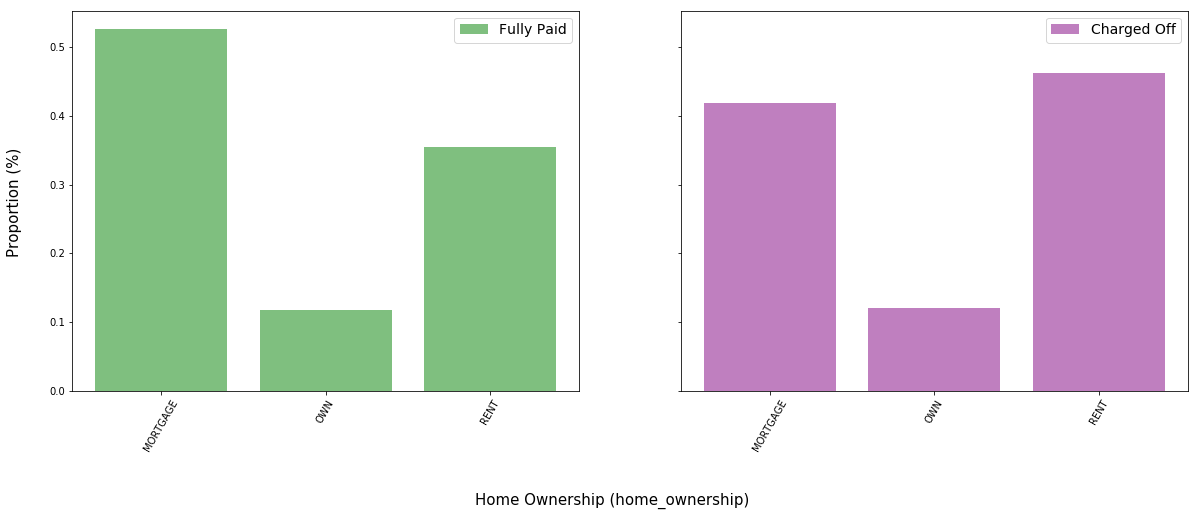

In [173]:
fphome = fp.iloc[:,8]
cfhome = cf.iloc[:,8]

dict_fphome = fphome.value_counts()
keys_fphome = sorted(dict_fphome.keys())
dict_fphome = OrderedDict((key,dict_fphome[key]) for key in keys_fphome)
dict_fphome.update((x, y/20000) for x, y in dict_fphome.items())

dict_cfhome = cfhome.value_counts()
keys_cfhome = sorted(dict_cfhome.keys())
dict_cfhome = OrderedDict((key,dict_cfhome[key]) for key in keys_cfhome)
dict_cfhome.update((x, y/20000) for x, y in dict_cfhome.items())

# Plot
f, sp = plt.subplots(1, 2, sharex=True, sharey=True, figsize=(20,7))

sp[0].bar(dict_fphome.keys(), dict_fphome.values(), color = 'g', alpha = 0.5)
sp[0].legend(['Fully Paid'],prop={'size': 14})
sp[1].bar(dict_cfhome.keys(), dict_cfhome.values(), color = 'purple', alpha=0.5)
sp[1].legend(['Charged Off'],prop={'size': 14})

for tick in sp[0].get_xticklabels():
    tick.set_rotation(60)
for tick in sp[1].get_xticklabels():
    tick.set_rotation(60)
    
f.text(0.5, -0.1, 'Home Ownership (home_ownership)', ha='center',size=15)
f.text(0.08, 0.5, 'Proportion (%)', va='center', rotation='vertical',size=15)

plt.show()

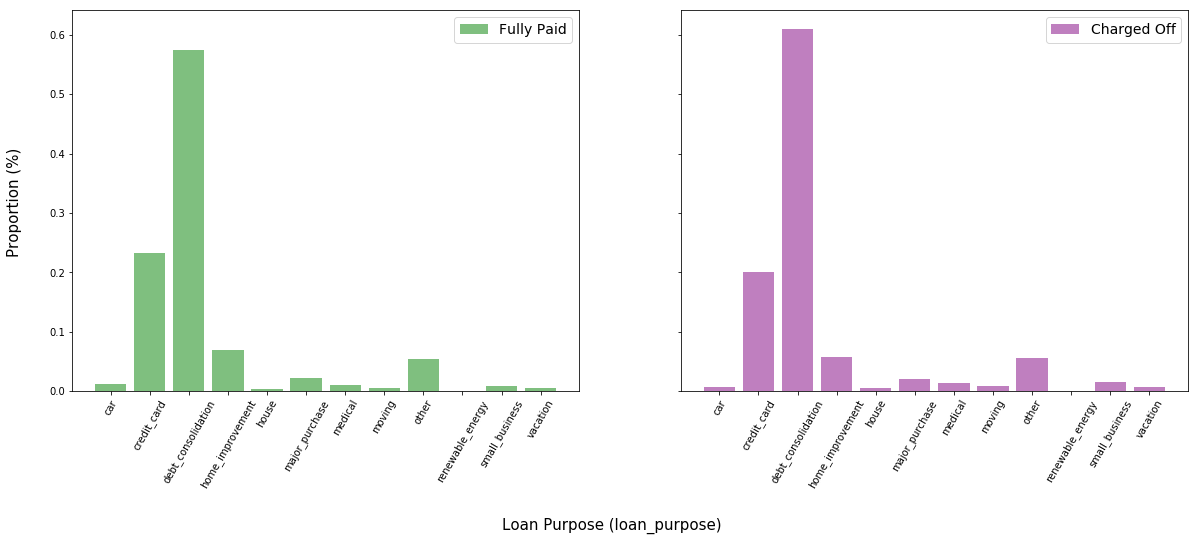

In [174]:
fppurp = fp.iloc[:,12]
cfpurp = cf.iloc[:,12]

dict_fppurp = fppurp.value_counts()
keys_fppurp = sorted(dict_fppurp.keys())
dict_fppurp = OrderedDict((key,dict_fppurp[key]) for key in keys_fppurp)
dict_fppurp.update((x, y/20000) for x, y in dict_fppurp.items())

dict_cfpurp = cfpurp.value_counts()
keys_cfpurp = sorted(dict_cfpurp.keys())
dict_cfpurp = OrderedDict((key,dict_cfpurp[key]) for key in keys_cfpurp)
dict_cfpurp.update((x, y/20000) for x, y in dict_cfpurp.items())

# Plot
f, sp = plt.subplots(1, 2, sharex=True, sharey=True, figsize=(20,7))

sp[0].bar(dict_fppurp.keys(), dict_fppurp.values(), color = 'g', alpha = 0.5)
sp[0].legend(['Fully Paid'],prop={'size': 14})
sp[1].bar(dict_cfpurp.keys(), dict_cfpurp.values(), color = 'purple', alpha=0.5)
sp[1].legend(['Charged Off'],prop={'size': 14})
    
for tick in sp[0].get_xticklabels():
    tick.set_rotation(60)
for tick in sp[1].get_xticklabels():
    tick.set_rotation(60)
    
f.text(0.5, -0.15, 'Loan Purpose (loan_purpose)', ha='center',size=15)
f.text(0.08, 0.5, 'Proportion (%)', va='center', rotation='vertical',size=15)

plt.show()

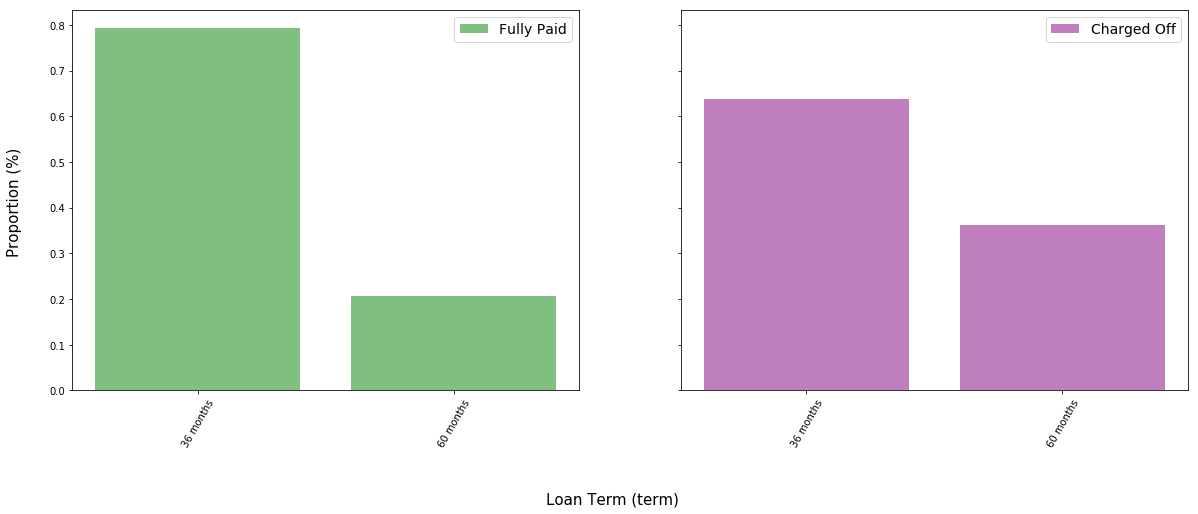

In [35]:
fphome = fp.iloc[:,3]
cfhome = cf.iloc[:,3]

dict_fphome = fphome.value_counts()
keys_fphome = sorted(dict_fphome.keys())
dict_fphome = OrderedDict((key,dict_fphome[key]) for key in keys_fphome)
dict_fphome.update((x, y/20000) for x, y in dict_fphome.items())

dict_cfhome = cfhome.value_counts()
keys_cfhome = sorted(dict_cfhome.keys())
dict_cfhome = OrderedDict((key,dict_cfhome[key]) for key in keys_cfhome)
dict_cfhome.update((x, y/20000) for x, y in dict_cfhome.items())

# Plot
f, sp = plt.subplots(1, 2, sharex=True, sharey=True, figsize=(20,7))

sp[0].bar(dict_fphome.keys(), dict_fphome.values(), color = 'g', alpha = 0.5)
sp[0].legend(['Fully Paid'],prop={'size': 14})
sp[1].bar(dict_cfhome.keys(), dict_cfhome.values(), color = 'purple', alpha=0.5)
sp[1].legend(['Charged Off'],prop={'size': 14})

for tick in sp[0].get_xticklabels():
    tick.set_rotation(60)
for tick in sp[1].get_xticklabels():
    tick.set_rotation(60)
    
f.text(0.5, -0.1, 'Loan Term (term)', ha='center',size=15)
f.text(0.08, 0.5, 'Proportion (%)', va='center', rotation='vertical',size=15)

plt.show()

/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


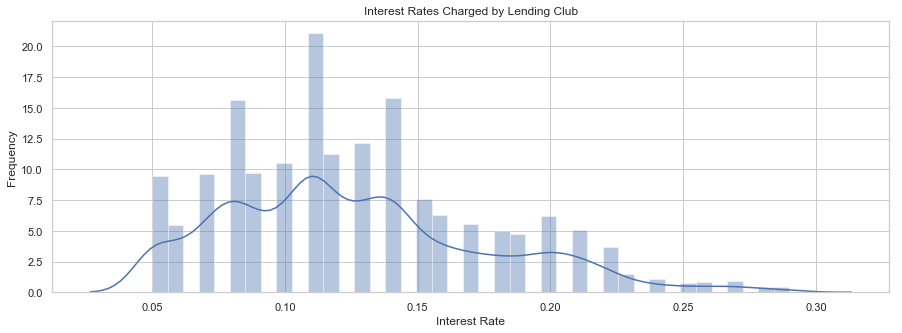

In [60]:
f, ax = plt.subplots(1,1,figsize=(15,5)) 
fig = sns.distplot(master["int_rate"])
plt.xlabel("Interest Rate")
plt.ylabel('Frequency')
plt.title("Interest Rates Charged by Lending Club")
plt.show(fig)

/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


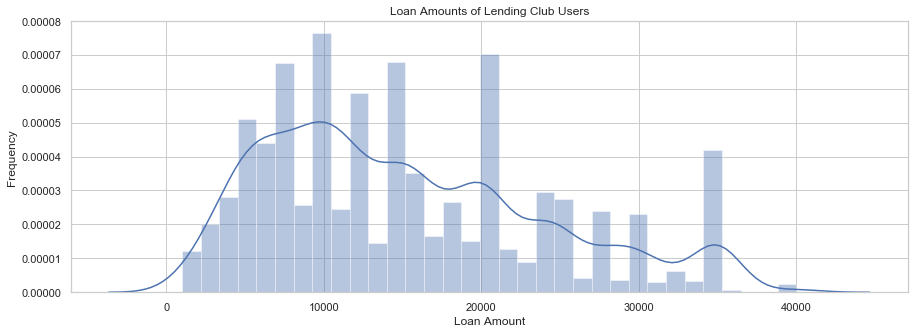

In [59]:
f, ax = plt.subplots(1,1,figsize=(15,5)) 
fig = sns.distplot(master["loan_amnt"])
plt.xlabel("Loan Amount")
plt.ylabel('Frequency')
plt.title("Loan Amounts of Lending Club Users")
plt.show(fig)

/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


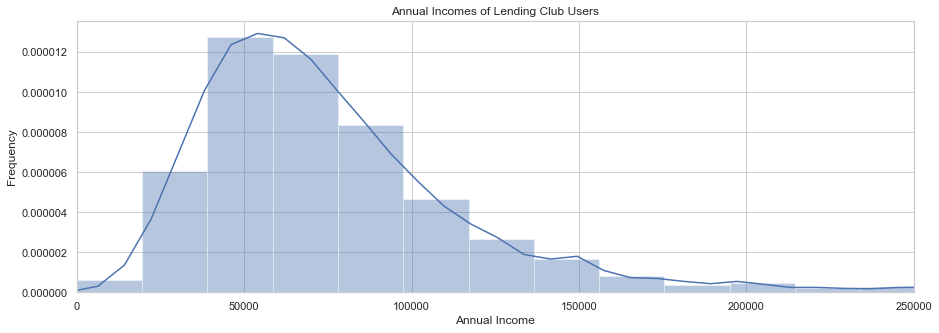

In [63]:
f, ax = plt.subplots(1,1,figsize=(15,5)) 
fig = sns.distplot(master["annual_inc"])
plt.xlim(0,250000)
plt.xlabel("Annual Income")
plt.ylabel('Frequency')
plt.title("Annual Incomes of Lending Club Users")
plt.show(fig)